In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import zero_one_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [2]:
X, y = datasets.make_hastie_10_2(n_samples=12000, random_state=1)
# 从12000个数据中取前2000行作为测试集，其余作为训练集
X_train, y_train = X[2000:], y[2000:]
X_test, y_test = X[:2000], y[:2000]

In [3]:
# 弱分类器，也就是随机分类
dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0-dt_stump.score(X_test, y_test)

In [4]:
# 决策树分类器
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_err = 1.0-dt.score(X_test, y_test)

In [5]:
# AdaBoost分类器
n_estimators = 200  # 设置AdaBoost迭代次数
ada = AdaBoostClassifier(base_estimator=dt_stump, n_estimators=n_estimators)
ada.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   n_estimators=200)

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'sans-serif' not found because none of the following families were found: SimHei


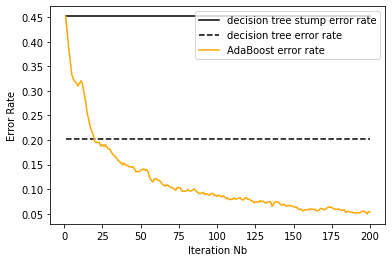

In [6]:
# 三个分类器的错误率可视化
fig = plt.figure()
plt.rcParams['font.sans-serif'] = ['SimHei']  # 设置plt正确显示中文
ax = fig.add_subplot(111)
ax.plot([1, n_estimators], [dt_stump_err]*2, 'k-', label='decision tree stump error rate')
ax.plot([1, n_estimators], [dt_err]*2, 'k--', label='decision tree error rate')
ada_err = np.zeros((n_estimators,))

# 遍历每次迭代的结果i为迭代次数, pred_y为预测结果
for i, y_pred in enumerate(ada.staged_predict(X_test)):
    ada_err[i] = zero_one_loss(y_pred, y_test)  # 统计错误率
    
# 绘制每次迭代的AdaBoost错误率
ax.plot(np.arange(n_estimators)+1, ada_err, label='AdaBoost error rate', color='orange')
ax.set_xlabel('Iteration Nb')
ax.set_ylabel('Error Rate')
leg = ax.legend(loc='upper right', fancybox=True)
plt.show()